In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import os
import sys
import copy
import keras
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from model import get_model
from utills import rearrange, load_data, extract_piece, swap_piece

In [63]:
base_path = 'data/puzzle_2x2/'

## Defining essential variables

In [64]:
cuts = 2    
channel = 3
im_size = 200

## Load pretrained model, you can download the model from [here](https://www.floydhub.com/shivaverma/workspaces/run_LEzD4uEtzqggKf5p2risz7NE)

In [65]:
model = keras.models.load_model('model/jigsaw.model')

## Or train from scratch model

In [249]:
model = get_model()

In [251]:
adam = keras.optimizers.Adam(lr=.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

In [247]:
x_val,   y_val   = load_data(base_path, 'valid')
x_train, y_train = load_data(base_path, 'train')

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))

## Loading test data

In [66]:
x_test, y_test = load_data(base_path, 'test')

In [316]:
from IPython.display import clear_output

## Testing indivisual Image

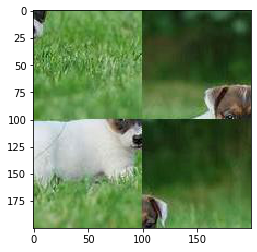

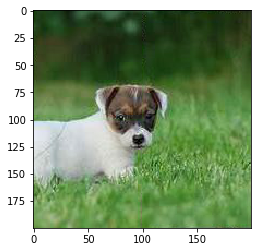

In [318]:
im = 22

plt.imshow(x_test[im].astype('float64')+.5)
plt.show()

inp = np.expand_dims(extract_piece(x_test[im]), axis=0)
out = model.predict(inp)[0]
out = np.argmax(out, axis=1)
rearrange(np.array(x_test[im])+.5, out)

## Testing whole test set

In [231]:
solved = 0
x_test_proc = []

for i in x_test:
    x_test_proc.append(extract_piece(i))
    
x_test_proc = np.array(x_test_proc) 
out = model.predict(x_test_proc)

for i in range(len(out)):
    pos = np.argmax(out[i], axis=1)
    if list(pos) == list(y_test[i].reshape(cuts*cuts)):
        solved += 1

print("Accuracy on {} samples: {}%".format(len(out), round((solved/i)*100, 2)))

Accuracy on 2176 samples: 80.05%


## Correct prediction percentage for each position

In [107]:
all_val = []

for i in range(len(out)):

    pos = np.argmax(out[i], axis=1)
    val = (pos==y_test[i].reshape(cuts*cuts)).astype('int')    
    all_val.append(val)

all_val = np.array(all_val)
[round(i, 2) for i in (np.sum(all_val, axis=0)/len(out))*100]

[90.9, 90.62, 90.49, 90.17]